# First part: ridge regression

In [143]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import numpy as np
import math
import sklearn
import random
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn import decomposition
from scipy.stats.stats import pearsonr  
from numpy import linalg

## Ridge regression

Ridge regression is a type of regression that introduces the concept of regularization through the alpha parameter in the ERM; at the end of this project we will see how to calibrate the value of this parameter

A regressor is a function

<img src = "images/regressor.png" width = "200">

 where <em>w</em> is a vector of real coefficients (weights), and <em>x</em> refers to the <em>x</em> component of training set

As anticipated before, the ERM is regularized by parameter <b>$\alpha$</b>

<img src= "images/ridge_regression.png" width = "350"/>

where S is the <b>design matrix</b>, the matrix of examples without labels

$\nabla(\left \| Sw - y \right \|^2 + \alpha \left \| w \right \|^2) = 2(S^TSw - S^Ty) + 2\alpha w$

since we want to minimize this function, let's set it equal to 0 and we obtain

$(S^TS + \alpha I)w = S^Ty$

$w = (S^TS + \alpha I)^{-1} S^Ty$

The regularization is needed since, without it, the vector is unstable; in particular, it can change a lot when the dataset is perturbed and let's keep in mind that we had to deal with missing values, hence we changed a fex examples and this could have led to a variance error.

### Estimator

In [3]:
class myRidgeRegressor(object):
    def __init__(self):
        pass
    
    def fit(self, S, y, alfa):
        self.w = linalg.inv(S.T.dot(S) + alfa * np.eye(S.shape[1])).dot(S.T.dot(y))
    
    def predict(self, x):
        return x.dot(self.w)

In [4]:
def square_loss(prediction, y):
    return (y - prediction) ** 2

In [5]:
def MSE(prediction, y):
    loss = square_loss(prediction, y)
    return 1/len(loss) * sum(loss)

### Loading preprocessed datasets

Let's load the preprocessed datasets, we will handle 4 cases:
1. the complete dataset with replaced missing values normalized with min-max
2. the reduced dataset (missing values have been removed) with min-max normalization
3. the complete dataset with z-score normalization
4. the reduced dataset normalized with z-score

In [6]:
min_max_norm_dataset = pd.read_csv("datasets/min_max_norm_dataset")
min_max_norm_reduced_dataset = pd.read_csv("datasets/min_max_norm_reduced_dataset")

zscore_norm_dataset = pd.read_csv("datasets/zscore_norm_dataset")
zscore_norm_reduced_dataset = pd.read_csv("datasets/zscore_norm_reduced_dataset")

In [7]:
del min_max_norm_dataset["Unnamed: 0"]
del min_max_norm_reduced_dataset["Unnamed: 0"]
del zscore_norm_dataset["Unnamed: 0"]
del zscore_norm_reduced_dataset["Unnamed: 0"]

### Splitting in training and test set

In [185]:
def split_dataset(dataset):
    y = dataset["median_house_value"]
    x = dataset.drop("median_house_value", axis = 1)
    return train_test_split(x, y, shuffle = True, test_size = 0.2)

Now we apply the ridge regressor for the 4 datasets and compute predictions, for this part it will be used $\alpha$ = 0.1

In [186]:
ridge_regressor = myRidgeRegressor()

### First dataset

In [187]:
x_train, x_test, y_train, y_test = split_dataset(min_max_norm_dataset)

We fit the regressor with the training set, we obtain a w vector of weights that depends on alpha parameter

In [188]:
ridge_regressor.fit(x_train, y_train, 0.1)
ridge_regressor.w

array([-0.15044212, -0.08913398,  0.1450492 , -0.3624389 ,  0.57456639,
       -0.78729069,  0.19979868,  0.74942012,  0.2193228 ])

and we can test the regressor on the test set to see how good predictions are done

In [189]:
predictions = ridge_regressor.predict(x_test)
predictions[:10]

565      0.396160
2659     0.194775
4906     0.525357
16121    0.095004
6581     0.472078
11991    0.589594
14262    0.422205
16279    0.631478
16403    0.545350
12333    0.735777
dtype: float64

In [190]:
loss = square_loss(predictions, y_test)

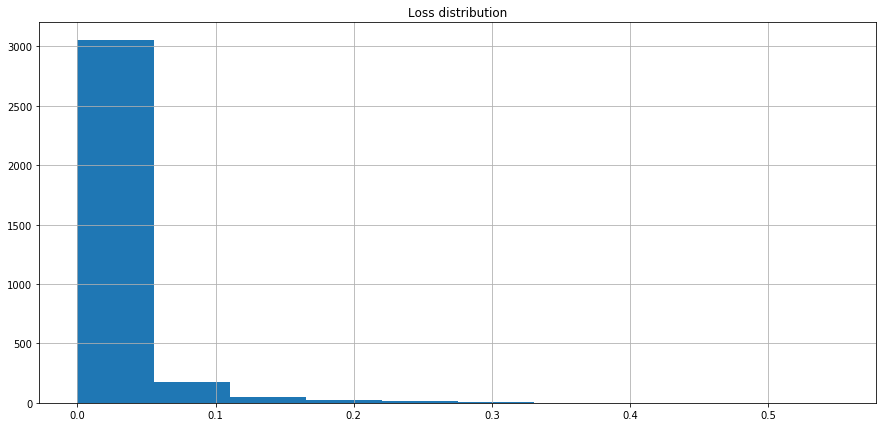

In [191]:
plt.figure(figsize=(15, 7))
plt.title('Loss distribution')
plt.hist(loss.values)
plt.grid()
plt.show()

In [192]:
test_error = MSE(predictions, y_test)
test_error

0.018412945670463962

In [193]:
r2_score(y_test, predictions)

0.6007501428658087

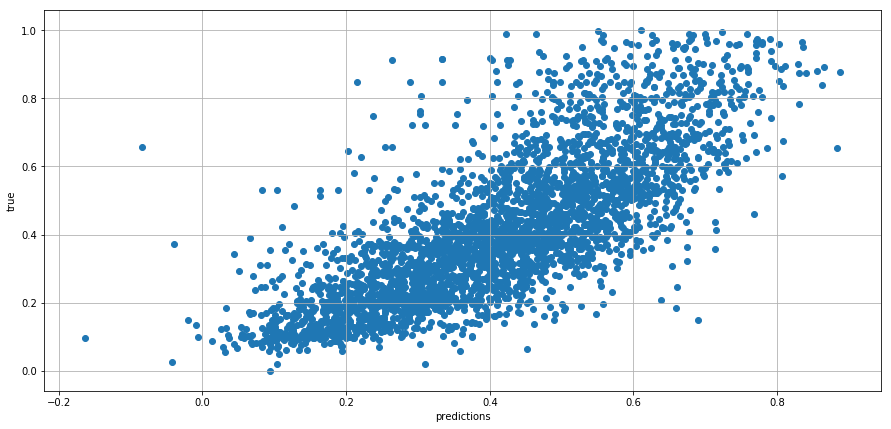

In [194]:
plt.figure(figsize=(15, 7))
plt.scatter(predictions, y_test)
plt.xlabel("predictions")
plt.ylabel("true")
plt.grid()
plt.show()

### Second dataset

In [195]:
x_train, x_test, y_train, y_test = split_dataset(min_max_norm_reduced_dataset)

In [196]:
ridge_regressor.fit(x_train, y_train, 0.1)
ridge_regressor.w

array([-0.15184937, -0.08502343,  0.14673837, -0.34306588,  0.59447559,
       -0.77763402,  0.16359441,  0.74313658,  0.2219347 ])

In [197]:
predictions = ridge_regressor.predict(x_test)
predictions[:10]

15340    0.600062
14989    0.125526
12923    0.588153
5216     0.425464
4384     0.234564
13462    0.477844
4612     0.516441
7272     0.568399
6506     0.447738
7275     0.751659
dtype: float64

In [198]:
loss = square_loss(predictions, y_test)

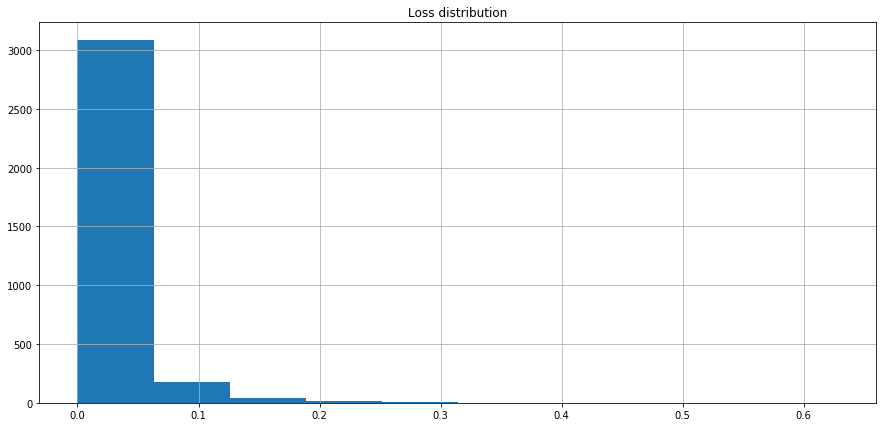

In [199]:
plt.figure(figsize=(15, 7))
plt.title('Loss distribution')
plt.hist(loss.values)
plt.grid()
plt.show()

In [200]:
test_error = MSE(predictions, y_test)
test_error

0.018395444677801638

In [201]:
r2_score(y_test, predictions)

0.599066826346162

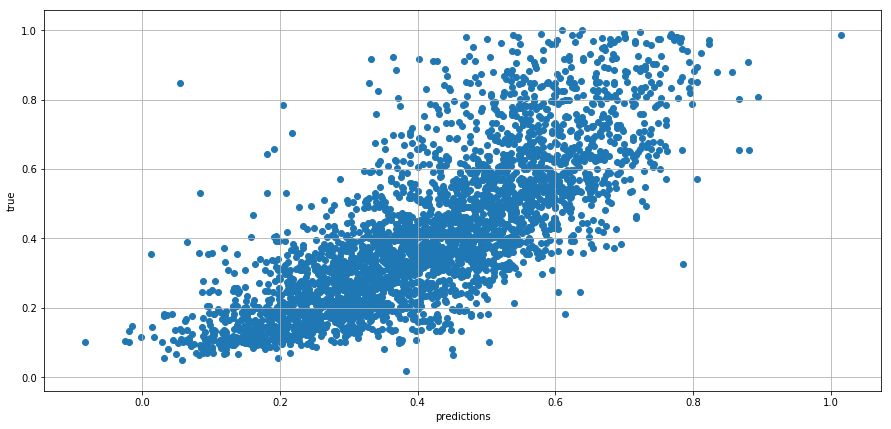

In [202]:
plt.figure(figsize=(15, 7))
plt.scatter(predictions, y_test)
plt.xlabel("predictions")
plt.ylabel("true")
plt.grid()
plt.show()

### Third dataset

In [203]:
x_train, x_test, y_train, y_test = split_dataset(zscore_norm_dataset)

In [204]:
ridge_regressor.fit(x_train, y_train, 0.1)
ridge_regressor.w

array([-0.59663814, -0.59824628,  0.11234566, -0.25452809,  0.44437201,
       -0.28599866,  0.10851769,  0.63508028,  0.15631547])

In [205]:
predictions = ridge_regressor.predict(x_test)
predictions[:10]

3633     0.149992
5568     1.641907
6076    -0.289337
3168     0.795303
12147    0.367460
1770    -1.544529
470      0.695457
13343   -0.677777
6268    -0.254681
3892    -0.550456
dtype: float64

In [206]:
loss = square_loss(predictions, y_test)

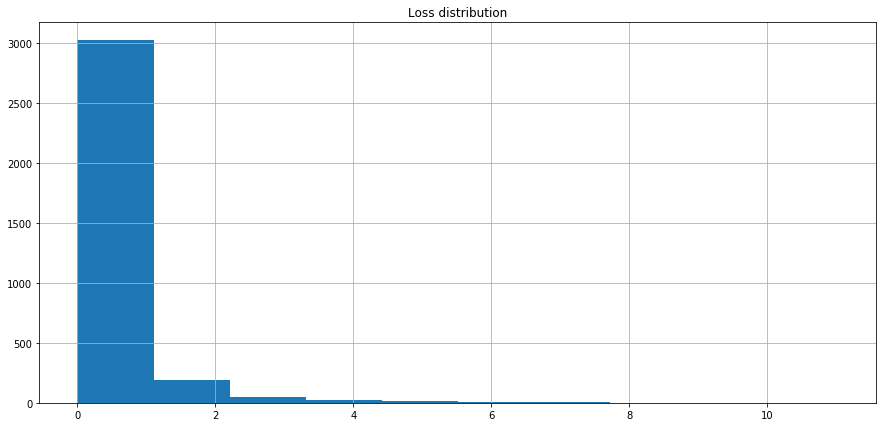

In [207]:
plt.figure(figsize=(15, 7))
plt.title('Loss distribution')
plt.hist(loss.values)
plt.grid()
plt.show()

In [208]:
test_error = MSE(predictions, y_test)
test_error

0.40332464635650583

In [209]:
r2_score(y_test, predictions)

0.6022854750967126

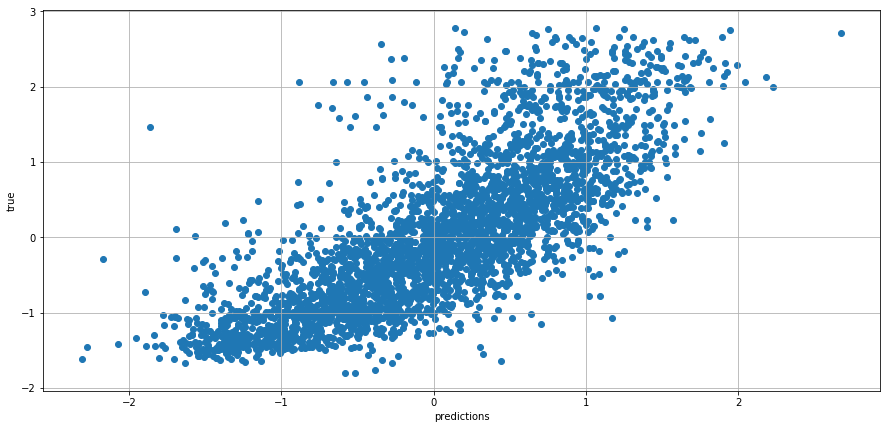

In [210]:
plt.figure(figsize=(15, 7))
plt.scatter(predictions, y_test)
plt.xlabel("predictions")
plt.ylabel("true")
plt.grid()
plt.show()

### Fourth dataset

In [211]:
x_train, x_test, y_train, y_test = split_dataset(zscore_norm_reduced_dataset)

In [212]:
ridge_regressor.fit(x_train, y_train, 0.1)
ridge_regressor.w

array([-0.62110239, -0.62304645,  0.10765513, -0.25803653,  0.47709612,
       -0.30504753,  0.09583654,  0.63313664,  0.1588729 ])

In [213]:
predictions = ridge_regressor.predict(x_test)
predictions[:10]

2582    -1.157352
9392     0.980950
10515   -0.545498
8025     0.899490
13672    1.287726
13407    0.248029
7893    -0.909017
4518     0.936626
8365     0.166844
1820    -1.039469
dtype: float64

In [214]:
loss = square_loss(predictions, y_test)

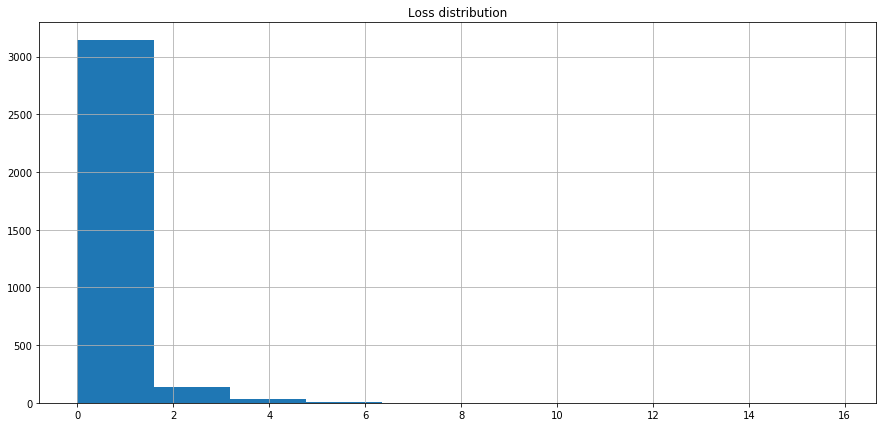

In [215]:
plt.figure(figsize=(15, 7))
plt.title('Loss distribution')
plt.hist(loss.values)
plt.grid()
plt.show()

In [216]:
test_error = MSE(predictions, y_test)
test_error

0.3933472952107051

In [217]:
r2_score(y_test, predictions)

0.5961514573841532

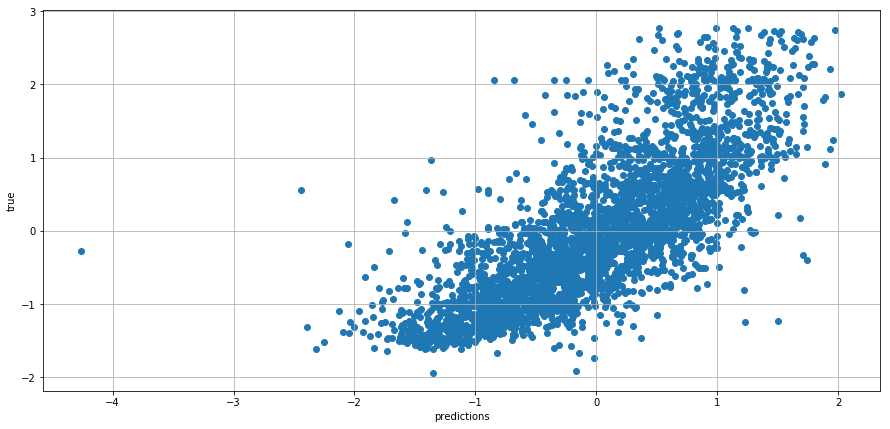

In [218]:
plt.figure(figsize=(15, 7))
plt.scatter(predictions, y_test)
plt.xlabel("predictions")
plt.ylabel("true")
plt.grid()
plt.show()

We notice a relevant difference in test error between the first two datasets with respect to the last twos, which reveals that min max normalization produces better result than z-score.
For what it concerns the replacement of missing values, we notice very little difference.

# Second part: analysis

We are dealing with a learning problem $(D, l)$ where $l$ is the square loss:

- Let $h(S)$ be the prediction of predictor $h$ on training set $S$
- Let $l_D(h(S))$ be the risk of $h(S)$
- Let $E[l_D(h)]$ be the expected risk of $h(S)$ where the expectation is with respect to the random draw of training set $S$

Hence, $E[l_D(h)]$ measures the performance of $h$ on a random training set whereas $l_D(h(S))$ measures the performance of $h$ when the training set is $S$

## K-fold cross validation

We would like to estimate $E[l_D(h)]$ to see, in general, the goodness of our predictor; in order to do this, we can use k-fold cross validation:  
let $S$ be the entire dataset, we partition $S$ in $K$ subsets (called folds) $D_1, D_2, ..., D_K$ of size $m/K$ each where $m$ is the size of $S$ and we use $S^{(k)}$ as <b>training part</b> with $S^{(k)} \equiv S \setminus D_k$ where $D_k$ is the <b>testing part</b>;
we iterate this process for $k = 1 ... K$.

In [219]:
m = len(min_max_norm_reduced_dataset)
K = 5

print(m, K)

16595 5


we choose $K$ such that $m$ is divisible with $K$

In [220]:
def cross_validation(dataset, K, alfa):   
    scores = []
    
    kf = KFold(n_splits = K, shuffle = True)
    
    for train_i, test_i in kf.split(dataset):
        
        x_train, x_test = dataset.iloc[train_i], dataset.iloc[test_i]
        y_train, y_test = dataset.iloc[train_i]["median_house_value"], dataset.iloc[test_i]["median_house_value"]

        # learning with training part
        ridge_regressor.fit(x_train, y_train, alfa)

        # testing with testing part
        result = ridge_regressor.predict(x_test)
        scores.append(MSE(result, y_test))

    return scores

Now let's compare the cv estimate for all 4 datasets we had before

In [221]:
cv_1 = np.mean(cross_validation(min_max_norm_dataset, K, 0.1))

cv_2 = np.mean(cross_validation(min_max_norm_reduced_dataset, K, 0.1))

cv_3 = np.mean(cross_validation(zscore_norm_dataset, K, 0.1))

cv_4 = np.mean(cross_validation(zscore_norm_reduced_dataset, K, 0.1))

print(cv_1, cv_2, cv_3, cv_4)

3.09270258129728e-09 3.092717337834955e-09 1.4542251497742716e-10 1.45569070843091e-10


## Dependence of the cross-validated risk estimate on the parameter alpha

For simplicity, let's consider only one dataset, we will choose the one that showed the best performance with $ \alpha = 0.1$

We will test 5000 values for $\alpha$, from 0 to 499 with a step of 0.1

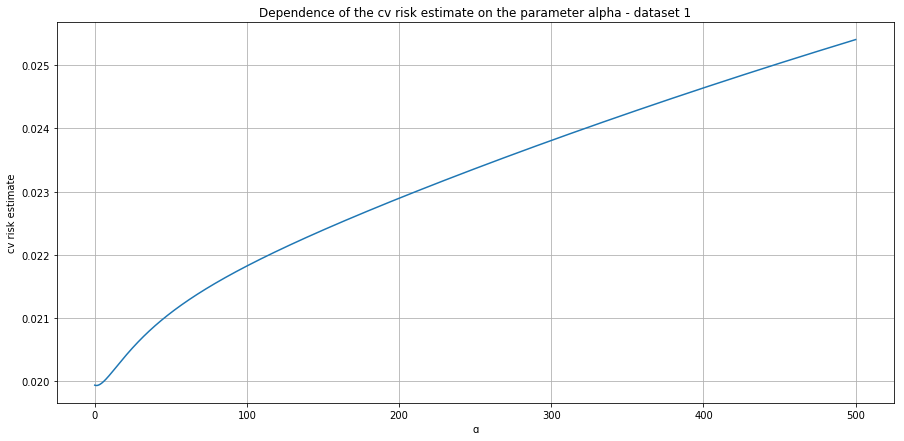

In [88]:
cv_scores = []
alfas = np.linspace(0.1, 500, 5000)

for i in alfas:
    cv_scores.append(np.mean(cross_validation(min_max_norm_dataset, 5, i)))
    
plt.figure(figsize=(15, 7))
plt.title('Dependence of the cv risk estimate on the parameter alpha - dataset 1')
plt.plot(alfas, cv_scores)
plt.xlabel("ɑ")
plt.ylabel("cv risk estimate")
plt.grid()
plt.show()

From this plot we can conclude that the cv risk estimate increseas monotonically for $\alpha \rightarrow \infty$

Let's study the behavior of the risk estimate with the other 3 datasets

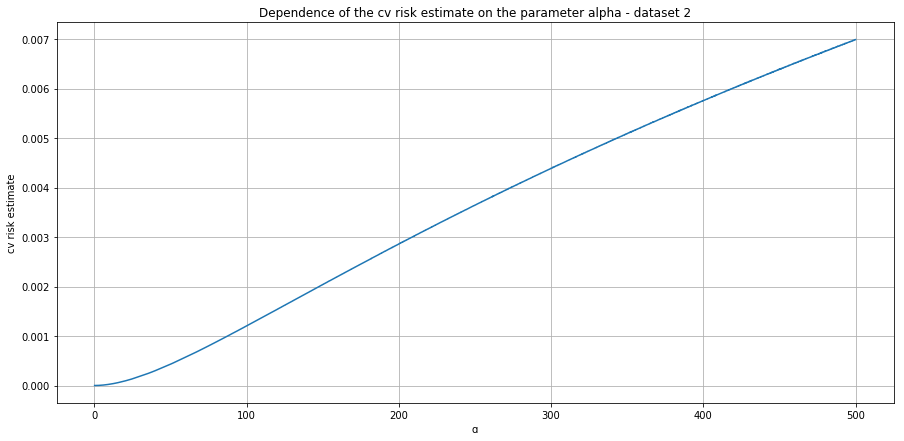

In [223]:
cv_scores = []
alfas = np.linspace(0.1, 500, 5000)

for i in alfas:
    cv_scores.append(np.mean(cross_validation(min_max_norm_reduced_dataset, 5, i)))
    
plt.figure(figsize=(15, 7))
plt.title('Dependence of the cv risk estimate on the parameter alpha - dataset 2')
plt.plot(alfas, cv_scores)
plt.xlabel("ɑ")
plt.ylabel("cv risk estimate")
plt.grid()
plt.show()

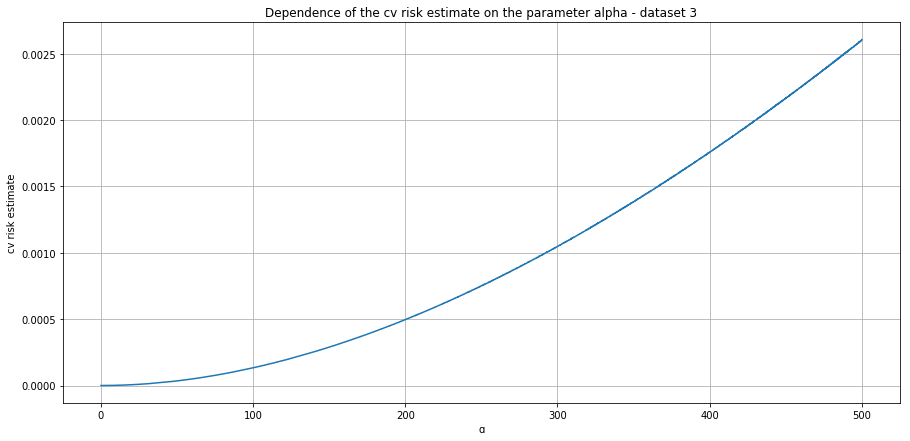

In [224]:
cv_scores = []
alfas = np.linspace(0.1, 500, 5000)

for i in alfas:
    cv_scores.append(np.mean(cross_validation(zscore_norm_dataset, 5, i)))
    
plt.figure(figsize=(15, 7))
plt.title('Dependence of the cv risk estimate on the parameter alpha - dataset 3')
plt.plot(alfas, cv_scores)
plt.xlabel("ɑ")
plt.ylabel("cv risk estimate")
plt.grid()
plt.show()

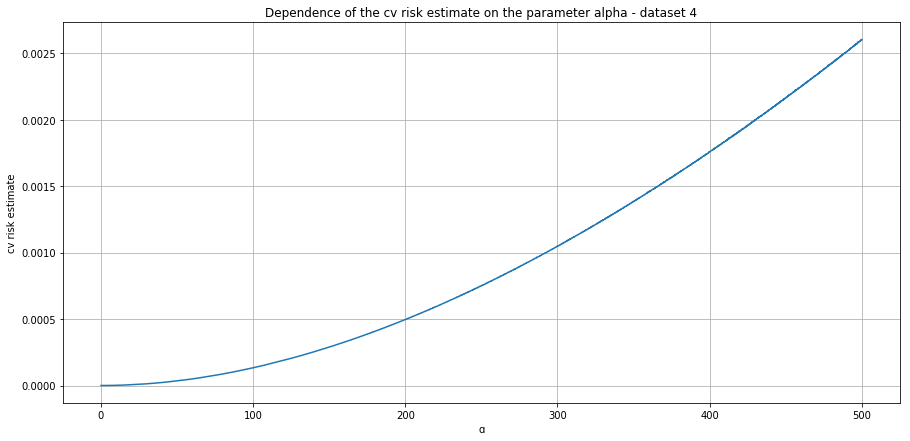

In [225]:
cv_scores = []
alfas = np.linspace(0.1, 500, 5000)

for i in alfas:
    cv_scores.append(np.mean(cross_validation(zscore_norm_reduced_dataset, 5, i)))
    
plt.figure(figsize=(15, 7))
plt.title('Dependence of the cv risk estimate on the parameter alpha - dataset 4')
plt.plot(alfas, cv_scores)
plt.xlabel("ɑ")
plt.ylabel("cv risk estimate")
plt.grid()
plt.show()

We see that for the last two datasets (z-score) there is a slight improvement by increasing alpha, so after normalizing with z-score, it's not true anymore that values towards 0 mean more accurate regressor, anyway, also in this case we have that the cv risk estimate increases as $\alpha \rightarrow \infty$ 

This means that there is a dependence of positive linear relationship between cv risk estimate and parameter alpha, in order to confirm this let's compute the correlation coefficient:

In [92]:
pearsonr(alfas, cv_scores)[0]

0.9881935045293208

This is highly confirmed by the Pearson coefficient.

After this analysis we try to do ridge regression with $\alpha = 0.001$ and see what happens

In [228]:
cv_1 = np.mean(cross_validation(min_max_norm_dataset, K, 0.001))

cv_2 = np.mean(cross_validation(min_max_norm_reduced_dataset, K, 0.001))

cv_3 = np.mean(cross_validation(zscore_norm_dataset, K, 0.001))

cv_4 = np.mean(cross_validation(zscore_norm_reduced_dataset, K, 0.001))

print(cv_1, cv_2, cv_3, cv_4)

3.099840069964885e-13 3.0987755526376705e-13 1.4534288371968692e-14 1.4538904429192156e-14


There is very little improvement in the first two datasets and a little worsening in the last twos: if we observe the curves of cv risk estimate against $\alpha$ we notice that this is not the optimal value, we briefly compute it for the last dataset

## Using PCA

In [231]:
def prediction_with_PCA(alfa, x_train, y_train, x_test, y_test):
    pca = decomposition.PCA(n_components=7)
    pca.fit(x_train)
    x_train_pca = pca.transform(x_train)
    x_test_pca = pca.transform(x_test)
    ridge_regressor.fit(x_train_pca, y_train, alfa = 0.1)
    predictions = ridge_regressor.predict(x_test_pca)
    test_error = MSE(predictions, y_test)
    return test_error

Now we can update our previous function of cross correlation by adding the PCA procedure

In [233]:
def cross_validation_with_PCA(dataset, K, alfa):   
    scores = []
    
    kf = KFold(n_splits = K, shuffle = True)
    
    for train_i, test_i in kf.split(dataset):
        
        x_train, x_test = dataset.iloc[train_i], dataset.iloc[test_i]
        y_train, y_test = dataset.iloc[train_i]["median_house_value"], dataset.iloc[test_i]["median_house_value"]

        # learning with training part
        ridge_regressor.fit(x_train, y_train, alfa)

        # testing with testing part
        # UPDATE
        pca_score = prediction_with_PCA(alfa, x_train, y_train, x_test, y_test)        
        
        scores.append(pca_score)

    return scores

In [234]:
cv_1 = np.mean(cross_validation_with_PCA(min_max_norm_dataset, K, 0.001))

cv_2 = np.mean(cross_validation_with_PCA(min_max_norm_reduced_dataset, K, 0.001))

cv_3 = np.mean(cross_validation_with_PCA(zscore_norm_dataset, K, 0.001))

cv_4 = np.mean(cross_validation_with_PCA(zscore_norm_reduced_dataset, K, 0.001))

print(cv_1, cv_2, cv_3, cv_4)

0.16925771164656117 0.16926119048129865 0.0014340944545757769 0.0014097576596349744


## optional: try nested CV to avoid choosing alpha

We are at the end of this notebook, and we want to perform nested cross validation in order to select automatically the best value for $\alpha$.  
From the previous plots we predict that the best value will be the closest value towards 0.

Nested cross validation works by adding at each iteration an inner cross validation where the algorithm tries a range of values for the hyperparameter, in this case $\alpha$, this means that each training part of $(m/K) * (K-1)$ size, is splitted in $L$ folds.    
Consequently, we want $(m/K) * (K-1)$ to be divisible by $L$.

In [39]:
L = 4
print(int(m/K) * (K-1), L)

13276 4


In [273]:
def nested_cross_validation(dataset, K, L, alfas):   
    best_result = 1000000000000
    best_alfa = 10000000000000
    scores = []
    
    kf = KFold(n_splits = K, shuffle = True)
    counter = 1
    for train_i, test_i in kf.split(dataset):
        kf = KFold(n_splits = L, shuffle = True)
        
        for inner_train_i, inner_test_i in kf.split(dataset.iloc[train_i]):
            inner_x_train, inner_x_test = dataset.iloc[inner_train_i], dataset.iloc[inner_test_i]
            inner_y_train, inner_y_test = dataset.iloc[inner_train_i]["median_house_value"], dataset.iloc[inner_test_i]["median_house_value"]
            
            inner_scores = []
                   
            for alf in alfas:
                # learning with training part
                ridge_regressor.fit(inner_x_train, inner_y_train, alf)

                # testing with testing part
                inner_result = ridge_regressor.predict(inner_x_test)
                inner_scores.append(MSE(inner_result, inner_y_test))
                
            average_inner_score = np.mean(inner_scores)
            best_inner_result = min(inner_scores) # the best result
            best_inner_result_position = inner_scores.index(best_inner_result) 
            best_inner_alfa = alfas[best_inner_result_position] # the best alfa
            
            if best_inner_result < best_result: # store the current best result obtained and update it if better
                best_result = best_inner_result
                best_alfa = best_inner_alfa
                
        x_train, x_test = dataset.iloc[train_i], dataset.iloc[test_i]
        y_train, y_test = dataset.iloc[train_i]["median_house_value"], dataset.iloc[test_i]["median_house_value"]

        # learning with training part
        ridge_regressor.fit(x_train, y_train, best_alfa)

        # testing with testing part
        result = ridge_regressor.predict(x_test)
        scores.append(MSE(result, y_test))

    return scores, best_alfa

Now we can find the best value of $\alpha$ in the range $(0.01 - 20)$ for the four datasets

In [274]:
nest_cv_1, best_alfa = nested_cross_validation(min_max_norm_dataset, 5, 4, np.linspace(0.01, 20, 2000))
nest_cv_1 = np.mean(nest_cv_1)
print(nest_cv_1, best_alfa)

3.0975784380334087e-11 0.01


In [276]:
nest_cv_2, best_alfa = nested_cross_validation(min_max_norm_reduced_dataset, 5, 4, np.linspace(0.01, 20, 2000))
nest_cv_2 = np.mean(nest_cv_2)
print(nest_cv_2, best_alfa)

3.100142537567127e-11 0.01


In [277]:
nest_cv_3, best_alfa = nested_cross_validation(zscore_norm_dataset, 5, 4, np.linspace(0.01, 20, 2000))
nest_cv_3 = np.mean(nest_cv_3)
print(nest_cv_3, best_alfa)

1.4535642411729603e-12 0.01


In [278]:
nest_cv_4, best_alfa = nested_cross_validation(zscore_norm_reduced_dataset, 5, 4, np.linspace(0.01, 20, 2000))
nest_cv_4 = np.mean(nest_cv_4)
print(nest_cv_4, best_alfa)

1.4556098750992536e-12 0.01


And we finally confirm that the best value is the closest one towards 0.